In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("../data/raw/train.csv")

In [3]:
train_df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [4]:
train_df.dtypes

building_id        int64
meter              int64
timestamp         object
meter_reading    float64
dtype: object

In [5]:
test_df = pd.read_csv("../data/raw/test.csv")

In [6]:
submission_df = pd.read_csv("../submissions/submission-1.065.csv");

In [7]:
test_df = test_df.merge(submission_df, on="row_id")

In [8]:
test_df.drop(columns="row_id", inplace=True)

In [9]:
test_df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2017-01-01 00:00:00,168.170537
1,1,0,2017-01-01 00:00:00,60.459634
2,2,0,2017-01-01 00:00:00,6.317182
3,3,0,2017-01-01 00:00:00,233.037190
4,4,0,2017-01-01 00:00:00,1094.490301


In [10]:
leak_df = pd.read_feather("../data/leak/leak.feather")

In [11]:
leak_df["timestamp"] = leak_df["timestamp"].dt.strftime("%Y-%m-%d %H:%M:%S")

In [12]:
leak_df.head()

,building_id,meter,meter_reading,timestamp
0,0,0.0,0.0,2016-01-01 00:00:00
1,1,0.0,0.0,2016-01-01 00:00:00
2,2,0.0,0.0,2016-01-01 00:00:00
3,3,0.0,0.0,2016-01-01 00:00:00
4,4,0.0,0.0,2016-01-01 00:00:00


In [13]:
leak_df.dtypes

building_id        int64
meter            float64
meter_reading    float64
timestamp         object
dtype: object

In [14]:
meter_names = {0: "electricity", 1: "chilledwater", 2: "steam", 3: "hotwater"}

In [17]:
def plot_building_list(l):
    count = len(l)
    fig = plt.figure(figsize=(16, 9))
    for i, (b, m) in enumerate(l):
        train_part_df = train_df.loc[(train_df["building_id"] == (b)) & (train_df["meter"] == m)]
        test_part_df = test_df.loc[(test_df["building_id"] == (b)) & (test_df["meter"] == m)]
        #leak_part_df = leak_df.loc[(leak_df["building_id"] == (b)) & (leak_df["meter"] == m)]
        part_df = train_part_df.append(test_part_df, ignore_index=True)
        part_df.reset_index(drop=True, inplace=True)
        xtick_values = ["2016-01-01 00:00:00", "2017-01-01 00:00:00", "2018-01-01 00:00:00", "2018-12-31 23:00:00"]

        ax = fig.add_subplot(count, 1, i + 1)
        ax.plot(train_part_df.groupby("timestamp")["meter_reading"].first(), label="training data")
        ax.plot(test_part_df.groupby("timestamp")["meter_reading"].first(), label="predicted data")
        ax.set_title("Building " + str(b) + " " + meter_names[m])
        ax.legend()
        ax.set_xticks(part_df["timestamp"][part_df["timestamp"].isin(xtick_values)].index)
        fig.canvas.draw()
        ax.set_xticklabels(["2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01"])

    fig.tight_layout()
    fig.savefig("../reports/figures/with-ids-1.065-building-168.svg", format="svg")
    fig.savefig("../reports/figures/with-ids-1.065-building-168.png", format="png")

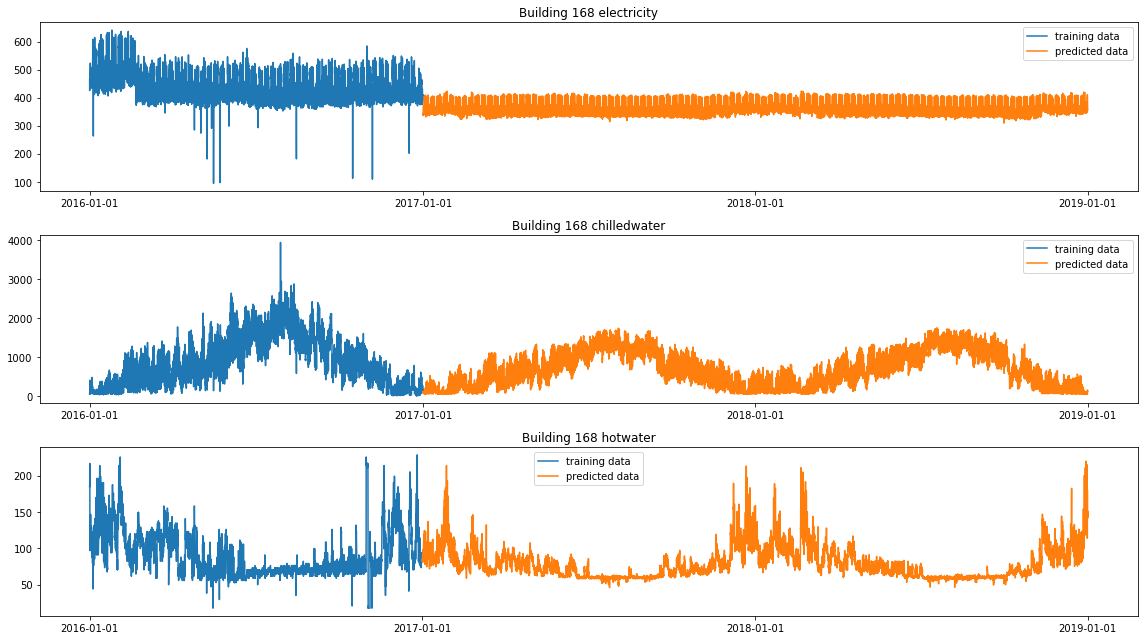

In [18]:
plot_building_list([
    (168, 0),
    (168, 1),
    (168, 3),
])

In [ ]:
test_data_df = pd.read_pickle("../data/processed/test_data.pkl")

In [ ]:
test_data_df.head(10)

In [ ]:
test_data_df.loc[test_data_df["year_built"] == 11].head(10)